In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# project modules
import os
import sys
sys.path.insert(0, os.path.abspath('../../modules'))

from helper_functions import count_nan_features

### Read the data

In [86]:
#df1 = pd.read_csv("../../data/training/BERRatingData_aa.csv", sep=";", on_bad_lines="skip", low_memory=False)
#df2 = pd.read_csv("../../data/training/BERRatingData_bv.csv", sep=";", on_bad_lines="skip", low_memory=False)
#df3 = pd.read_csv("../../data/training/BERRatingData_cd.csv", sep=";", on_bad_lines="skip", low_memory=False)
df4 = pd.read_csv("../../data/training/BERRatingData_cu.csv", sep=";", on_bad_lines="skip", low_memory=False)

#df = pd.concat([df1, df2, df3, df4], axis=0)
df = df4

print(df.shape)

df.head()

(9977, 211)


,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,...,ThirdWallAgeBandId,ThirdWallTypeId,SA_Code,prob_smarea_error_0corr,prob_smarea_error_100corr,RER,RenewEPnren,RenewEPren,CPC,EPC
0,Co. Louth,Detached house,2010,Existing,B2,104.11,307.33,0.27,0.20,0.24,...,NaN,NaN,147012001,0.050000,0.050000,0.027,31995.20,895.896,0.976,0.815
1,Co. Limerick,Detached house,2022,Final,A2,41.75,194.60,0.16,0.12,0.12,...,NaN,NaN,NaN,NaN,NaN,0.517,8125.22,8681.630,0.228,0.245
2,Co. Kerry,Detached house,1994,Existing,C2,190.35,166.65,0.55,0.40,0.41,...,NaN,NaN,077165004/077165005,0.050000,0.050000,0.000,31721.50,0.000,1.746,1.441
3,Co. Louth,Ground-floor apartment,1999,Existing,F,383.42,38.69,0.96,0.00,0.44,...,NaN,NaN,147014011,0.050000,0.050000,0.000,14834.50,0.000,1.680,1.719
4,Co. Kerry,Detached house,1930,Existing,A3,63.96,252.81,0.36,0.37,0.34,...,10.0,1.0,77052001,0.088309,0.088309,0.656,16170.80,30855.400,0.397,0.428


### Count Number of NaN's

In [87]:
count_nan_features(df, 0.5)

No of features with more than 50.0% NaN's: 70


### Drop NaN Features

In [88]:
#df = df.dropna(axis=1, thresh=int(0.7*len(df)))
count_nan_features(df, 0.1)

No of features with more than 10.0% NaN's: 77


### Drop Categories 

In [89]:
# drop columns which are swaying the results

df_1 = df.drop(['CPC', 'EPC', 'RER', 'RenewEPnren', 'RenewEPren', 'SA_Code', 'PurposeOfRating', 'EnergyRating', 'HESSchemeUpgrade', 'DateOfAssessment', 'CO2Rating', 'CO2MainSpace', 'MPCDERValue'], axis=1)
print("df_1.shape:", df_1.shape)

df_1.shape: (9977, 198)


In [90]:
# drop features with more than 20 category values
categorical_cols = df_1.select_dtypes(include='O').keys()
# unique values in each columns
cats_to_drop = []
for x in df_1.columns:
  if x in categorical_cols:
    if len(df_1[x].unique()) > 20:
      cats_to_drop.append(x) 
    #print(x ,':', len(df[x].unique()))

df_2 = df_1.drop(cats_to_drop, axis=1)
print("df_2.shape:", df_2.shape)

categorical_cols = df_2.select_dtypes(include='O').keys()
#print(categorical_cols)

df_3 = pd.get_dummies(df_2, columns = categorical_cols)

print("df_3.shape:", df_3.shape)
df_3.head()

df_2.shape: (9977, 192)
df_3.shape: (9977, 289)


,Year_of_Construction,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,WallArea,RoofArea,...,ThirdWallType_Description_300mm Cavity,ThirdWallType_Description_300mm Filled Cavity,ThirdWallType_Description_325mm Solid Brick,ThirdWallType_Description_Concrete Hollow Block,ThirdWallType_Description_Other,ThirdWallType_Description_Solid Mass Concrete,ThirdWallType_Description_Stone,ThirdWallType_Description_Timber Frame,ThirdWallIsSemiExposed_No,ThirdWallIsSemiExposed_Yes
0,2010,104.11,307.33,0.27,0.20,0.24,2.00,2.87,249.04,168.72,...,False,False,False,False,False,False,False,False,False,False
1,2022,41.75,194.60,0.16,0.12,0.12,0.93,1.30,178.23,200.22,...,False,False,False,False,False,False,False,False,False,False
2,1994,190.35,166.65,0.55,0.40,0.41,3.10,3.00,85.41,141.26,...,False,False,False,False,False,False,False,False,False,False
3,1999,383.42,38.69,0.96,0.00,0.44,3.30,1.36,40.49,0.00,...,False,False,False,False,False,False,False,False,False,False
4,1930,63.96,252.81,0.36,0.37,0.34,2.20,2.33,239.90,178.84,...,False,False,False,False,False,False,True,False,False,True


### Baseline model: Train/test split

In [91]:
from sklearn.model_selection import train_test_split

X = df_3.drop('BerRating', axis='columns')
#y = df['BerRating']
y = df_3.BerRating

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, shuffle=True,random_state=2) # tried to include 'stratify=y' but it's giving an error


In [105]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
count_nan_features(df_3, 0.5)

(6983, 288)
(6983,)
(2994, 288)
(2994,)
No of features with more than 50.0% NaN's: 60


### Baseline model: Hist Gradient Boosting Regressor, reduced features, hot-one encoded

In [109]:
# Build HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error

hgbr = HistGradientBoostingRegressor(learning_rate=0.2)
hgbr.fit(X_train, y_train)
y_train_preds = hgbr.predict(X_train)
y_preds = hgbr.predict(X_test)

# metrics
score=hgbr.score(X_test,y_test)
print("R2: {:.3f}%".format(score*100) )
print("Mean absolute error: " f"{mean_absolute_error(y_test, y_preds):.3f} kWh/m2/year")
print("Median absolute error: " f"{median_absolute_error(y_test, y_preds):.3f} kWh/m2/year")
print("Mean absolute percentage error: " f"{mean_absolute_percentage_error(y_test, y_preds) * 100:.3f} %")


R2: 96.376%
Mean absolute error: 11.391 kWh/m2/year
Median absolute error: 5.414 kWh/m2/year
Mean absolute percentage error: 8.420 %


### Scatter Plot - Training Accuracy

(6983, 288)
(6983,)
(6983,)


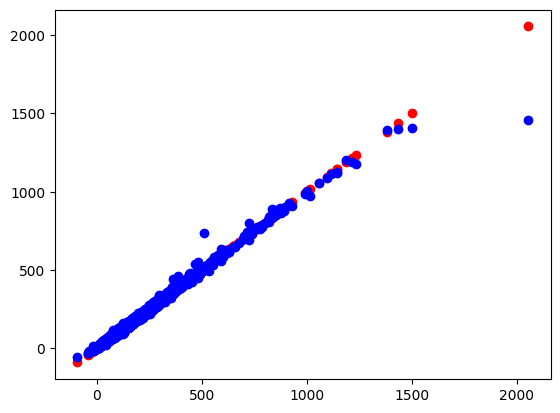

In [112]:
print(X_train.shape)
print(y_train.shape)
print(y_train_preds.shape)

# scatter plot - training accuracy
fig, ax = plt.subplots()
ax.scatter(y_train,y_train, color = "red")
ax.scatter(y_train,y_train_preds, color = "blue")

### Scatter Plot - Test Accuracy

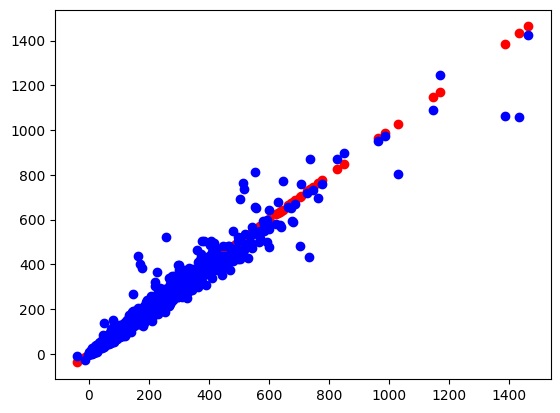

In [113]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_test, color = "red")
ax.scatter(y_test,y_preds, color = "blue")

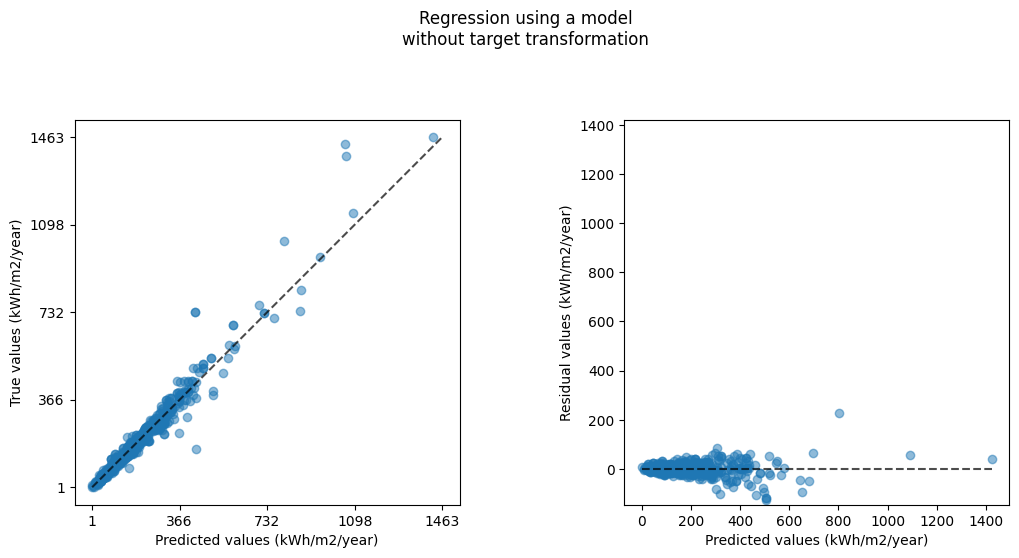

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(13, 5))

PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_preds,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[0],
)
axs[0].axis("square")
axs[0].set_xlabel("Predicted values (kWh/m2/year)")
axs[0].set_ylabel("True values (kWh/m2/year)")

PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_preds,
    kind="residual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[1],
)
axs[1].axis("square")
axs[1].set_xlabel("Predicted values (kWh/m2/year)")
axs[1].set_ylabel("Residual values (kWh/m2/year)")

_ = fig.suptitle(
    "Regression using a model\nwithout target transformation", y=1.1
)

### Feature selection techniques 
#### Variance threshold

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# train
df_4 = pd.DataFrame(scaler.fit_transform(df_3),columns = df_3.columns)

# drop all-NaN features 
df_5= df_4.dropna(axis=1, how='all')
df_4.shape

c:\Users\jbyrne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
c:\Users\jbyrne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


(9977, 289)

In [96]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=0.01)
var = var.fit(df_5)

cols = var.get_support()
cols

array([ True, False, False,  True, False,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [97]:
# low variance features/columns
lowVarianceFeatures = [column for column in df_5.columns if column not in df_5.columns[cols]]

for feature in lowVarianceFeatures:
  print(feature)

BerRating
GroundFloorArea(sq m)
UValueRoof
WallArea
WindowArea
DoorArea
HSEffAdjFactor
SupplSHFuel
SHRenewableResources
WHRenewableResources
NoOfChimneys
NoOfFluelessGasFires
GroundFloorUValue
ApertureArea
VolumeOfPreHeatStore
DeliveredLightingEnergy
DeliveredEnergyPumpsFans
DeliveredEnergyMainWater
DeliveredEnergyMainSpace
PrimaryEnergyLighting
PrimaryEnergyPumpsFans
PrimaryEnergyMainWater
PrimaryEnergyMainSpace
CO2Lighting
CO2PumpsFans
CO2MainWater
GroundFloorHeight
FirstFloorArea
SecondFloorArea
ThirdFloorArea
ThirdFloorHeight
PredominantRoofTypeArea
LowEnergyLightingPercent
TotalDeliveredEnergy
DeliveredEnergySecondarySpace
DeliveredEnergySupplementaryWater
CO2SecondarySpace
CO2SupplementaryWater
PrimaryEnergySecondarySpace
PrimaryEnergySupplementaryWater
RoomInRoofArea
FirstPartLTotalContribution
FirstEnerConsumedDelivered
FirstEnerConsumedConvFactor
FirstEnerConsumedCO2EmissionFactor
SecondEnergyTypeId
SecondEnerProdDelivered
SecondPartLTotalContribution
SecondEnerConsumedDeliver

In [98]:
# drop low variance features
df_6 = df_5.drop(lowVarianceFeatures, axis=1)
df_6 = df_5
df_6.head()

,Year_of_Construction,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,WallArea,RoofArea,...,ThirdWallType_Description_300mm Cavity,ThirdWallType_Description_300mm Filled Cavity,ThirdWallType_Description_325mm Solid Brick,ThirdWallType_Description_Concrete Hollow Block,ThirdWallType_Description_Other,ThirdWallType_Description_Solid Mass Concrete,ThirdWallType_Description_Stone,ThirdWallType_Description_Timber Frame,ThirdWallIsSemiExposed_No,ThirdWallIsSemiExposed_Yes
0,0.950570,0.091009,0.334652,0.101266,0.044444,0.195122,0.324818,0.542533,0.346521,0.316774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.996198,0.061966,0.206505,0.054852,0.026667,0.097561,0.129562,0.245747,0.247597,0.375915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.889734,0.131173,0.174732,0.219409,0.088889,0.333333,0.525547,0.567108,0.117924,0.265217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.908745,0.221092,0.029272,0.392405,0.000000,0.357724,0.562044,0.257089,0.055169,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.646388,0.072309,0.272676,0.139241,0.082222,0.276423,0.361314,0.440454,0.333752,0.335774,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [99]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split( df_6, y, test_size=0.3, shuffle=True,random_state=2) # tried to include 'stratify=y' but it's giving an error
X_train_2.shape

(6983, 248)

In [100]:
count_nan_features(df_6, 0.2)

No of features with more than 20.0% NaN's: 23


In [101]:
#hgbr = HistGradientBoostingRegressor( loss='squared_error', learning_rate=0.1, max_depth=None, max_bins=255, random_state=101)
hgbr = HistGradientBoostingRegressor(learning_rate=0.2)
hgbr.fit(X_train_2, y_train_2)
y_preds = hgbr.predict(X_test_2)

# metrics
score=hgbr.score(X_test_2,y_test_2)
print("R2: {:.3f}%".format(score*100) )
print("Mean absolute error: " f"{mean_absolute_error(y_test, y_preds):.3f} kWh/m2/year")
print("Median absolute error: " f"{median_absolute_error(y_test, y_preds):.3f} kWh/m2/year")
print("Mean absolute percentage error: " f"{mean_absolute_percentage_error(y_test, y_preds) * 100:.3f} %")

R2: 99.169%
Mean absolute error: 2.109 kWh/m2/year
Median absolute error: 0.444 kWh/m2/year
Mean absolute percentage error: 2.088 %


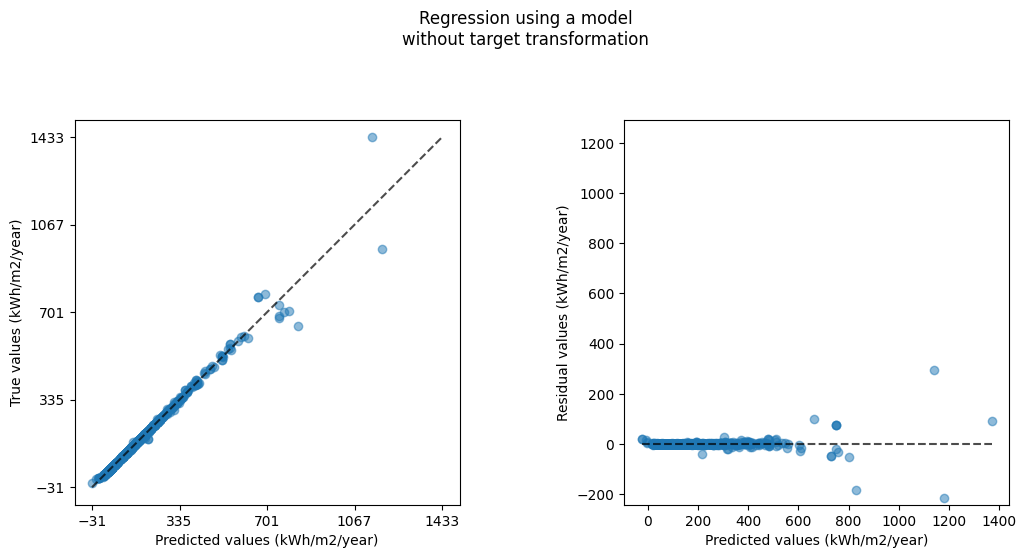

In [102]:
# plot 
fig, axs = plt.subplots(ncols=2, figsize=(13, 5))

PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_preds,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[0],
)
axs[0].axis("square")
axs[0].set_xlabel("Predicted values (kWh/m2/year)")
axs[0].set_ylabel("True values (kWh/m2/year)")

PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_preds,
    kind="residual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[1],
)
axs[1].axis("square")
axs[1].set_xlabel("Predicted values (kWh/m2/year)")
axs[1].set_ylabel("Residual values (kWh/m2/year)")

_ = fig.suptitle(
    "Regression using a model\nwithout target transformation", y=1.1
)

In [103]:
# learning rate
learning_rates = [x * 0.05 for x in range(1, 20)]

print("Learning Rate R2         MAE         MAE         MAPE")
for eta in learning_rates:
   hgbr = HistGradientBoostingRegressor(learning_rate=eta)
   hgbr.fit(X_train_2, y_train_2)
   y_preds = hgbr.predict(X_test_2)
   
   score = hgbr.score(X_test_2,y_test_2)
   r2 = score*100
   mae = mean_absolute_error(y_test, y_preds)
   medianae = median_absolute_error(y_test, y_preds)
   mape = mean_absolute_percentage_error(y_test, y_preds) * 100

   print(round(eta,2), '\t', r2, mae, medianae, mape)


Learning Rate R2         MAE         MAE         MAPE
0.05 	 99.18478686620797 1.845625181974438 0.5684033487441589 2.0013962957964573
0.1 	 99.17822261230721 1.8439580736836978 0.31279371886663654 1.7483728120495465
0.15 	 99.23991576935146 1.8887532003330962 0.36810970342938987 1.9470000257382885
0.2 	 99.16866202156015 2.109460931330428 0.4444617057429454 2.0881720937363966
0.25 	 99.19997295114868 2.256653232042892 0.5243090461557145 2.243235308200733
0.3 	 99.19042205052459 2.319229121904267 0.5886769633421203 2.2325085688873556
0.35 	 99.24206548073259 2.303929046324748 0.6341994548892895 2.006160128838745
0.4 	 99.23804015785723 2.326184259920304 0.7079843029472581 2.2426271275812306
0.45 	 99.1615208797797 2.4753006831308713 0.6962084949909091 2.2799112297082464
0.5 	 99.12326167272144 2.6367153213964203 0.7285231706426814 2.289581238031173
0.55 	 99.03973322654505 2.8247544123271746 0.721598611395823 2.310542260292007
0.6 	 98.83579490925335 2.96007016155032 0.8467833485914866